In [ ]:
import sys
sys.path.append('../')  # To ensure utils can be imported if needed

from utils.data_loader import load_precomputed_results
from utils.plotters.bar_plot import plot_bar_data, plot_bar_data_correction
from utils.plotters.error_analysis import plot_error_analysis_full, plot_error_analysis_full_bar, plot_error_analysis_full_line
from utils.plotters.latex_table import print_latex_table, print_flat_latex_table, print_pearson_correlation_table
from utils.plotters.sankey_plot import plot_sankey_data, plot_position_distribution
from utils.annotator.tools import evaluate_results

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Load precomputed results
df_results = load_precomputed_results("../exp_results/eval/results.pkl")
line_data = load_precomputed_results("../exp_results/eval/line_plot_data.pkl")
error_data_1b = load_precomputed_results("../exp_results/eval/error_analysis_data_Llama-3.2-1B-Instruct.pkl")
error_data_3b = load_precomputed_results("../exp_results/eval/error_analysis_data_Llama-3.2-3B-Instruct.pkl")
error_data_11b = load_precomputed_results("../exp_results/eval/error_analysis_data_Llama-3.2-11B-Vision-Instruct.pkl")
df_sankey = load_precomputed_results("../exp_results/eval/test_400_perturbed_premise_evaluated.pkl")
df_sankey_1b = load_precomputed_results("../exp_results/eval/test_400_perturbed_premise_evaluated_1b.pkl")

## Observations

### LaTeX code for the table

In [4]:
print_flat_latex_table(df_results)

\begin{tabular}{p{2.7cm}|p{2.35cm}p{2.35cm}p{2.7cm}p{2.7cm}p{2.25cm}p{2.35cm}p{2.35cm}p{2.25cm}}
\toprule
        & LlaMA-3.2-1B & LlaMA-3.2-3B & LlaMAV-3.2-11B & LlaMAV-3.2-90B & Qwen-2-72B & Mixtral-8×7B & Mixtral-8×22B & GPT-4o-mini \\ \midgrayline
Original & 71.73 \tiny{[67.97, 75.21]} & 88.25 \tiny{[86.21, 90.04]} & 88.43 \tiny{[86.41, 90.12]} & 96.43 \tiny{[95.44, 97.29]} & 95.22 \tiny{[94.04, 96.31]} & 76.92 \tiny{[73.62, 80.19]} & 88.20 \tiny{[86.41, 89.90]} & 98.03 \tiny{[97.31, 98.62]} \\
\midgrayline
\midgrayline
+Misinfo. OOD & 40.74 \tiny{[36.16, 45.29]} & 38.41 \tiny{[34.79, 41.91]} & 38.30 \tiny{[34.67, 42.06]} & 56.69 \tiny{[53.20, 60.23]} & 73.46 \tiny{[69.85, 76.69]} & 26.38 \tiny{[22.40, 30.61]} & 55.84 \tiny{[52.09, 59.53]} & 85.64 \tiny{[82.75, 88.38]} \\
\midgrayline
Relative Decrease & 43.20\% & 56.48\% & 56.69\% & 41.20\% & 22.85\% & 65.70\% & 36.69\% & 12.64\% \\
\midgrayline
\midgrayline
+Misinfo. IND & 42.65 \tiny{[38.05, 47.11]} & 49.71 \tiny{[45.63, 53.60]}

In [ ]:
# Print latex tables
print_latex_table(df_results)

\begin{tabular}{p{3.0cm}|p{2.35cm}p{2.35cm}p{2.7cm}p{2.7cm}p{2.25cm}p{2.35cm}p{2.35cm}p{2.25cm}}
\toprule
        & LlaMA-3.2-1B & LlaMA-3.2-3B & LlaMAV-3.2-11B & LlaMAV-3.2-90B & Qwen-2-72B & Mixtral-8×7B & Mixtral-8×22B & GPT-4o-mini \\ \midgrayline
\multicolumn{9}{>{\columncolor{\grayColor}} c}{\textit{Accuracy upon re-prompting without misinformation: $\mathbb{E}_{q \in Q_c}[A_{q}^{(2)}]$}}\\ \midgrayline
Original & 71.73 \tiny{[67.97, 75.21]} & 88.25 \tiny{[86.21, 90.04]} & 88.43 \tiny{[86.41, 90.12]} & 96.43 \tiny{[95.44, 97.29]} & 95.22 \tiny{[94.04, 96.31]} & 76.92 \tiny{[73.62, 80.19]} & 88.20 \tiny{[86.41, 89.90]} & 98.03 \tiny{[97.31, 98.62]} \\
\midgrayline
\multicolumn{9}{>{\columncolor{\grayColor}} c}{\textit{Accuracy under misinformation: $\mathbb{E}_{q \in Q_c}[A_{q_{m}}^{(2)}]$}}\\ \midgrayline
Out-of-distribution & 40.74 \tiny{[36.16, 45.29]} & 38.41 \tiny{[34.79, 41.91]} & 38.30 \tiny{[34.67, 42.06]} & 56.69 \tiny{[53.20, 60.23]} & 73.46 \tiny{[69.85, 76.69]} & 26.38

### Bar plot

Accuracy in a subset of correctly-answered questions without user misinformation categorized on subsets with different levels of confidence
Source: human


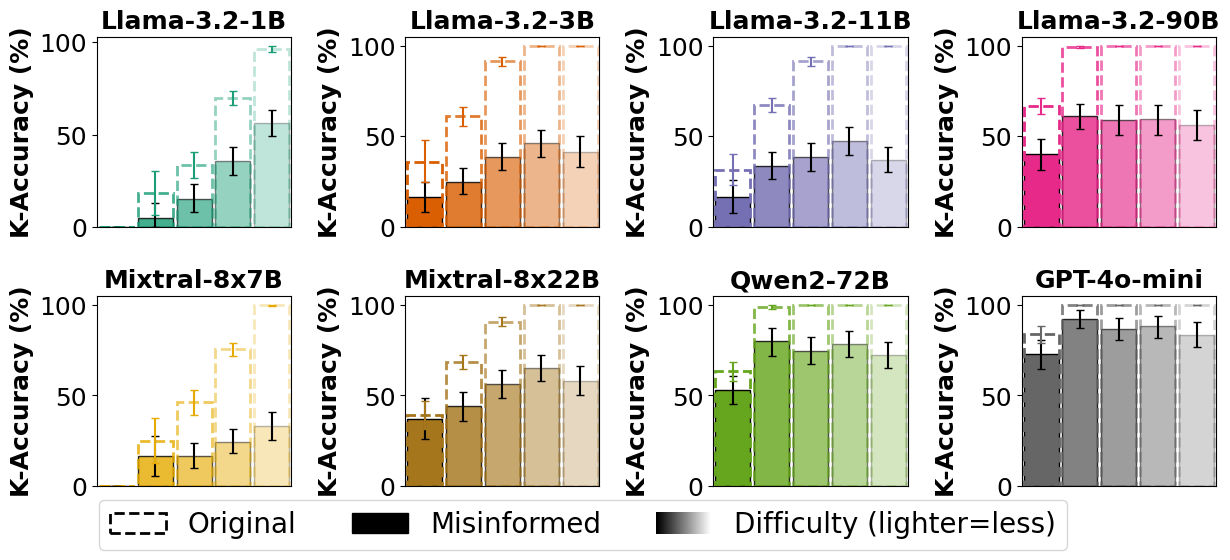

\begin{tabular}{p{3.0cm}|p{2.35cm}p{2.35cm}p{2.7cm}p{2.7cm}p{2.25cm}p{2.35cm}p{2.35cm}p{2.25cm}p{2.25cm}}
\toprule
\textbf{Pearson Corr.} & LlaMA-3.2-1B & LlaMA-3.2-3B & LlaMAV-3.2-11B & LlaMAV-3.2-90B & Qwen-2-72B & Mixtral-8×7B & Mixtral-8×22B & GPT-4o-mini & All Models \\ \midgrayline
Coefficients & -0.97 & 0.19 & 0.84 & 0.76 & 0.86 & 0.81 & 0.78 & 0.52 & 0.23 \\
\midgrayline
P-Values & 0.03 & 0.77 & 0.07 & 0.13 & 0.06 & 0.19 & 0.12 & 0.36 & 0.17 \\
\bottomrule
\end{tabular}


In [18]:
plt.style.use(['default'])

# Mapping from column keys to readable names
columns2names = {
    "prfx_q": "W.o. misinformation",
    "prfx_pert_prfx_q": "W. misinformation",
}
columns = ["prfx_q", "prfx_pert_prfx_q"]

# List of model names
model_names = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.2-11B-Vision-Instruct",
    "Llama-3.2-90B-Vision-Instruct-Turbo",
    "Mixtral-8x7B-Instruct-v0.1",
    "Mixtral-8x22B-Instruct-v0.1",
    "Qwen2-72B-Instruct",
    "gpt-4o-mini"
]

perturbation_role = "human"
pearson_pairs = plot_bar_data(line_data, model_names, columns, columns2names, "human")

print("Accuracy in a subset of correctly-answered questions without user misinformation categorized on subsets with different levels of confidence")
print("Source: human")

plt.savefig(f"../figures/bar_ood.pdf", bbox_inches="tight")
plt.show()

print_pearson_correlation_table(pearson_pairs)

In [7]:
easiest_accuracies = []
for model_name in model_names:
    easiest_accuracies.append(line_data[model_name]['human']['prfx_q'][-1]['mean'])
print(f"Average accuracy for easies subset questions: {sum(easiest_accuracies) / len(easiest_accuracies):.2f}%")

degrade_ratios = []
for model_name in model_names:
    degrade_ratios.append(line_data[model_name]['human']['prfx_pert_prfx_q'][-1]['mean'] / line_data[model_name]['human']['prfx_q'][-1]['mean'] * 100)
print(f"Average degradation ratio for easies subset questions: {sum(degrade_ratios) / len(degrade_ratios):.2f}%")

Average accuracy for easies subset questions: 99.51%
Average degradation ratio for easies subset questions: 55.07%


### Bar plot (Correction)

Llama-3.2-1B is 34.23% worse when prompting to improve correction frequency.
Mixtral-8x7B is 18.93% worse when prompting to improve correction frequency.
There is still a gap of 42.31% accuracy on average to be recovered from the prompting setting to vanilla.


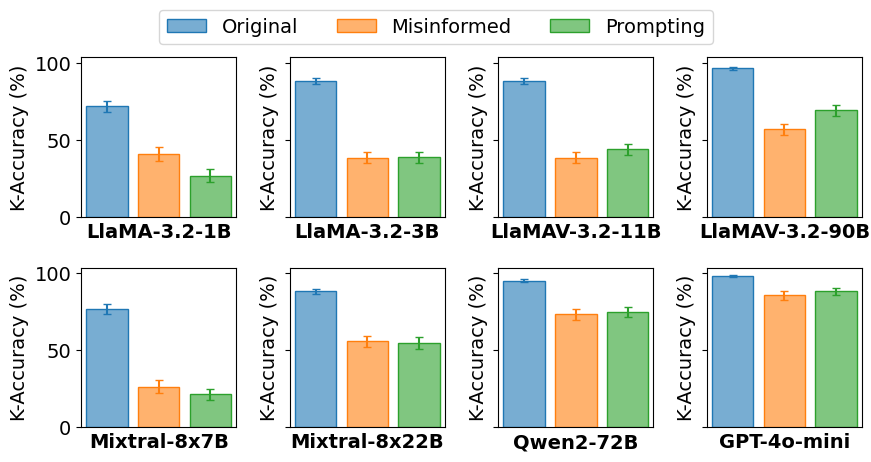

In [8]:
plt.style.use(['default'])

# Mapping from column keys to readable names
columns2names = {
    "prfx_q": "Original",
    "prfx_pert_prfx_q": "Misinformed",
    "prfx_pert_prfx_q_both": "Prompting",
    # "prfx_pert_prfx_q_2step": "Correction\nat user prompts",
}
# columns = ["prfx_q", "prfx_pert_prfx_q", "prfx_pert_prfx_q_both", "prfx_pert_prfx_q_2step"]
columns = ["prfx_q", "prfx_pert_prfx_q", "prfx_pert_prfx_q_both"]

# List of model names
model_names = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.2-11B-Vision-Instruct",
    "Llama-3.2-90B-Vision-Instruct-Turbo",
    "Mixtral-8x7B-Instruct-v0.1",
    "Mixtral-8x22B-Instruct-v0.1",
    "Qwen2-72B-Instruct",
    "gpt-4o-mini"
]

perturbation_role = "human"
plot_bar_data_correction(df_results, model_names, columns, columns2names, "human")

ratio = (df_results['Llama-3.2-1B-Instruct']['human']["mean"].loc["mix", "prfx_pert_prfx_q"] - df_results['Llama-3.2-1B-Instruct']['human']["mean"].loc["mix", "prfx_pert_prfx_q_both"]) / df_results['Llama-3.2-1B-Instruct']['human']["mean"].loc["mix", "prfx_pert_prfx_q"]
print(f"Llama-3.2-1B is {ratio*100:.2f}% worse when prompting to improve correction frequency.")
ratio = (df_results['Mixtral-8x7B-Instruct-v0.1']['human']["mean"].loc["mix", "prfx_pert_prfx_q"] - df_results['Mixtral-8x7B-Instruct-v0.1']['human']["mean"].loc["mix", "prfx_pert_prfx_q_both"]) / df_results['Mixtral-8x7B-Instruct-v0.1']['human']["mean"].loc["mix", "prfx_pert_prfx_q"]
print(f"Mixtral-8x7B is {ratio*100:.2f}% worse when prompting to improve correction frequency.")

ratios = []
for model_name in model_names:
    ratios.append((df_results[model_name]['human']["mean"].loc["mix", "prfx_q"] - df_results[model_name]['human']["mean"].loc["mix", "prfx_pert_prfx_q_both"]) / df_results[model_name]['human']["mean"].loc["mix", "prfx_q"])
ratio = sum(ratios) / len(ratios)
print(f"There is still a gap of {ratio*100:.2f}% accuracy on average to be recovered from the prompting setting to vanilla.")

plt.savefig(f"../figures/bar_correction.pdf", bbox_inches="tight")
plt.show()

### Sankey diagram

In [15]:
df = df_sankey.copy()

# Ensure 'overall_correct_original', 'overall_correct' and 'point_out_error' are booleans
df['overall_correct'] = df['overall_correct'].astype(bool)
df['point_out_correct'] = df['point_out_correct'].astype(bool)
df['detection'] = df['detection'].apply(lambda x: x['label'])
df['detection_prompting'] = df['detection_prompting'].apply(lambda x: x['label'])
df['correction'] = df['correction'].apply(lambda x: x['label'])
df['correction_prompting'] = df['correction_prompting'].apply(lambda x: x['label'])

# Map 'overall_correct_original', 'overall_correct' and 'point_out_error' to labels
df['Detect'] = df['detection'].map({True: 'Corr\\n', False: 'N-Corr    \\n'})
df['DetectPrompt'] = df['detection_prompting'].map({True: 'Corr\\n', False: 'N-Corr    \\n'})

# Three-state mapping for 'Correct' and 'CorrectPrompt'
def map_correct(row):
    if not row['detection']:
        return 'N-Corr\\n'
    elif row['detection'] and not row['correction']:
        return 'NF-Corr\\n'
    elif row['detection'] and row['correction']:
        return 'F-Corr\\n'

df['Correct'] = df.apply(map_correct, axis=1)
df['CorrectPrompt'] = df.apply(lambda row: map_correct({'detection': row['detection_prompting'], 'correction': row['correction_prompting']}), axis=1)

df['Overall'] = df['overall_correct'].map({True: '✅ Answer\\n', False: '❎ Answer\\n'})
df['OverallPrompt'] = df['point_out_correct'].map({True: '✅ Answer\\n', False: '❎ Answer\\n'})

# Group by 'Original', 'Overall' and 'ErrorPoint' to get counts
grouped = df.groupby(['Detect', 'Correct', 'Overall']).size().reset_index(name='counts')
html_template = plot_sankey_data(['Detect', 'Correct', 'Overall'], grouped)

ratio = grouped[(grouped['Correct'] == 'F-Corr\\n') & (grouped['Overall'] == '✅ Answer\\n')].counts.sum() / grouped[grouped['Correct'] == 'F-Corr\\n'].counts.sum()
print(f"{ratio*100:.2f}% of the successful corrections have a correct overall answer.")
ratio = 1 - grouped[(grouped['Correct'] == 'F-Corr\\n') & (grouped['Overall'] == '❎ Answer\\n')].counts.sum() / grouped[grouped['Overall'] == '❎ Answer\\n'].counts.sum()
print(f"{ratio*100:.2f}% of the overall inaccuracies have a failed or No Identification.")

# Save the html file. I have no idea to save it as a pdf.
with open(f"../figures/sankey.html", "w") as html_file:
    html_file.write(html_template)
    
grouped = df.groupby(['DetectPrompt', 'CorrectPrompt', 'OverallPrompt']).size().reset_index(name='counts')
html_template = plot_sankey_data(['DetectPrompt', 'CorrectPrompt', 'OverallPrompt'], grouped)

ratio = grouped[(grouped['CorrectPrompt'] == 'F-Corr\\n') & (grouped['OverallPrompt'] == '✅ Answer\\n')].counts.sum() / grouped[grouped['CorrectPrompt'] == 'F-Corr\\n'].counts.sum()
print(f"{ratio*100:.2f}% of the successful corrections have a correct overall answer.")
ratio = 1 - grouped[(grouped['CorrectPrompt'] == 'F-Corr\\n') & (grouped['OverallPrompt'] == '❎ Answer\\n')].counts.sum() / grouped[grouped['OverallPrompt'] == '❎ Answer\\n'].counts.sum()
print(f"{ratio*100:.2f}% of the overall inaccuracies have a failed or No Identification.")

# Save the html file. I have no idea to save it as a pdf.
with open(f"../figures/sankey_prompt.html", "w") as html_file:
    html_file.write(html_template)

92.31% of the successful corrections have a correct overall answer.
97.62% of the overall inaccuracies have a failed or No Identification.
93.26% of the successful corrections have a correct overall answer.
88.39% of the overall inaccuracies have a failed or No Identification.


In [10]:
grouped

,DetectPrompt,CorrectPrompt,OverallPrompt,counts
0,🔍 Identify\n✅,🔧 Factually Rectify\n✅,K-Acc\n✅,180
1,🔍 Identify\n✅,🔧 Factually Rectify\n✅,K-Acc\n❌,13
2,🔍 Identify\n✅,🔧 Nonfactually Rectify\n❌,K-Acc\n✅,65
3,🔍 Identify\n✅,🔧 Nonfactually Rectify\n❌,K-Acc\n❌,74
4,🔍 Not Identify \n❌,🔧 Not Rectify\n❌,K-Acc\n✅,43
5,🔍 Not Identify \n❌,🔧 Not Rectify\n❌,K-Acc\n❌,25


In [ ]:
ratio = 1 - grouped[(grouped['CorrectPrompt'] == 'F-Corr\\n') & (grouped['OverallPrompt'] == '❎ Answer\\n')].counts.sum() / grouped[grouped['OverallPrompt'] == '❎ Answer\\n'].counts.sum()

In [16]:
df = df_sankey_1b.copy()

# Ensure 'overall_correct_original', 'overall_correct' and 'point_out_error' are booleans
df['overall_correct'] = df['overall_correct'].astype(bool)
df['point_out_correct'] = df['point_out_correct'].astype(bool)
df['detection'] = df['detection'].apply(lambda x: x['label'])
df['detection_prompting'] = df['detection_prompting'].apply(lambda x: x['label'])
df['correction'] = df['correction'].apply(lambda x: x['label'])
df['correction_prompting'] = df['correction_prompting'].apply(lambda x: x['label'])

# Map 'overall_correct_original', 'overall_correct' and 'point_out_error' to labels
df['Detect'] = df['detection'].map({True: 'Corr\\n', False: 'N-Corr    \\n'})
df['DetectPrompt'] = df['detection_prompting'].map({True: 'Corr\\n', False: 'N-Corr    \\n'})

# Three-state mapping for 'Correct' and 'CorrectPrompt'
def map_correct(row):
    if not row['detection']:
        return 'N-Corr\\n'
    elif row['detection'] and not row['correction']:
        return 'NF-Corr\\n'
    elif row['detection'] and row['correction']:
        return 'F-Corr\\n'

df['Correct'] = df.apply(map_correct, axis=1)
df['CorrectPrompt'] = df.apply(lambda row: map_correct({'detection': row['detection_prompting'], 'correction': row['correction_prompting']}), axis=1)

df['Overall'] = df['overall_correct'].map({True: '✅ Answer\\n', False: '❎ Answer\\n'})
df['OverallPrompt'] = df['point_out_correct'].map({True: '✅ Answer\\n', False: '❎ Answer\\n'})

# Group by 'Original', 'Overall' and 'ErrorPoint' to get counts
grouped = df.groupby(['Detect', 'Correct', 'Overall']).size().reset_index(name='counts')
html_template = plot_sankey_data(['Detect', 'Correct', 'Overall'], grouped)

# Save the html file. I have no idea to save it as a pdf.
with open(f"../figures/sankey_1b.html", "w") as html_file:
    html_file.write(html_template)
    
grouped = df.groupby(['DetectPrompt', 'CorrectPrompt', 'OverallPrompt']).size().reset_index(name='counts')
html_template = plot_sankey_data(['DetectPrompt', 'CorrectPrompt', 'OverallPrompt'], grouped)

# Save the html file. I have no idea to save it as a pdf.
with open(f"../figures/sankey_prompt_1b.html", "w") as html_file:
    html_file.write(html_template)

In [17]:
df = df_sankey.copy()

# Ensure 'overall_correct_original', 'overall_correct' and 'point_out_error' are booleans
df['overall_correct'] = df['overall_correct'].astype(bool)
df['point_out_correct'] = df['point_out_correct'].astype(bool)
df['perturbation'] = df['perturbation'].apply(lambda x: x['label'])
df['perturbation_prompting'] = df['perturbation_prompting'].apply(lambda x: x['label'])

# Map 'overall_correct_original', 'overall_correct' and 'point_out_error' to labels
df['Perturb'] = df['perturbation'].map({True: 'Follow Misinformation \\n😈', False: 'Not Follow Misinformation \\n🛡'})
df['Overall'] = df['overall_correct'].map({True: '✅ Answer\\n', False: '❎ Answer\\n'})
# Group by 'Original', 'Overall' and 'ErrorPoint' to get counts
grouped = df.groupby(['Perturb', 'Overall']).size().reset_index(name='counts')
html_template = plot_sankey_data(['Perturb', 'Overall'], grouped, wide=True)

perturb_str = "Follow Misinformation \\n😈"
overall_str = "❎ Answer\\n"
ratio = (
    grouped[(grouped["Perturb"] == perturb_str) &
            (grouped["Overall"] == overall_str)]
    .counts.sum()
    /
    grouped[grouped["Perturb"] == perturb_str].counts.sum()
    * 100
)
print(f"Ratio of misinformation following -> subset inaccuracy: {ratio:.2f}%")
perturb_str = "Follow Misinformation \\n😈"
overall_str = "❎ Answer\\n"
ratio = (
    grouped[(grouped["Perturb"] == perturb_str) &
            (grouped["Overall"] == overall_str)]
    .counts.sum()
    /
    grouped[grouped["Overall"] == overall_str].counts.sum() 
    * 100
)
print(f"Ratio of subset inaccuracy -> misinformation following: {ratio:.2f}%")
perturb_str = "Not Follow Misinformation \\n🛡"
overall_str = "✅ Answer\\n"
ratio = (
    grouped[(grouped["Perturb"] == perturb_str) &
            (grouped["Overall"] == overall_str)]
    .counts.sum()
    /
    grouped[grouped["Perturb"] == perturb_str].counts.sum()
    * 100
)
print(f"Ratio of misinformation resisting -> subset accuracy: {ratio:.2f}%")
perturb_str = "Not Follow Misinformation \\n🛡"
overall_str = "✅ Answer\\n"
ratio = (
    grouped[(grouped["Perturb"] == perturb_str) &
            (grouped["Overall"] == overall_str)]
    .counts.sum()
    /
    grouped[grouped["Overall"] == overall_str].counts.sum()
    * 100
)
print(f"Ratio of subset accuracy -> misinformation resisting: {ratio:.2f}%")

perturb_str = "Follow Misinformation \\n😈"
overall_str = "✅ Answer\\n"
ratio = (
    grouped[(grouped["Perturb"] == perturb_str) &
            (grouped["Overall"] == overall_str)]
    .counts.sum()
    /
    len(df)
    * 100
)
print(f"{ratio:.2f}% of the data is subset accurate and follows misinformation.")
perturb_str = "Not Follow Misinformation \\n🛡"
overall_str = "❎ Answer\\n"
ratio = (
    grouped[(grouped["Perturb"] == perturb_str) &
            (grouped["Overall"] == overall_str)]
    .counts.sum()
    /
    len(df)
    * 100
)
print(f"{ratio:.2f}% of the data is subset inaccurate and resists misinformation.")

# Save the html file. I have no idea to save it as a pdf.
with open(f"../figures/sankey_perturbed.html", "w") as html_file:
    html_file.write(html_template)

df['PerturbPrompt'] = df['perturbation_prompting'].map({True: 'Follow Misinformation \\n😈', False: 'Not Follow Misinformation\\n🛡'})
df['OverallPrompt'] = df['point_out_correct'].map({True: '✅ Answer\\n', False: '❎ Answer\\n'})

# Group by 'Original', 'Overall' and 'ErrorPoint' to get counts
grouped = df.groupby(['PerturbPrompt', 'OverallPrompt']).size().reset_index(name='counts')
html_template = plot_sankey_data(['PerturbPrompt', 'OverallPrompt'], grouped, wide=True)

# Save the html file. I have no idea to save it as a pdf.
with open(f"../figures/sankey_perturbed_prompt.html", "w") as html_file:
    html_file.write(html_template)

Ratio of misinformation following -> subset inaccuracy: 63.47%
Ratio of subset inaccuracy -> misinformation following: 84.13%
Ratio of misinformation resisting -> subset accuracy: 91.42%
Ratio of subset accuracy -> misinformation resisting: 77.74%
15.25% of the data is subset accurate and follows misinformation.
5.00% of the data is subset inaccurate and resists misinformation.


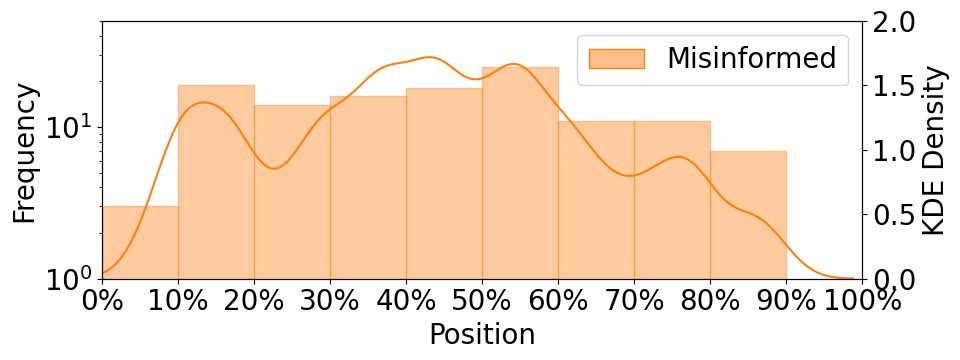

In [8]:
plot_position_distribution(df_sankey)
plt.savefig("../figures/position_distribution.pdf", bbox_inches="tight")
plt.show()

## Counterfactual Error Correction Analysis

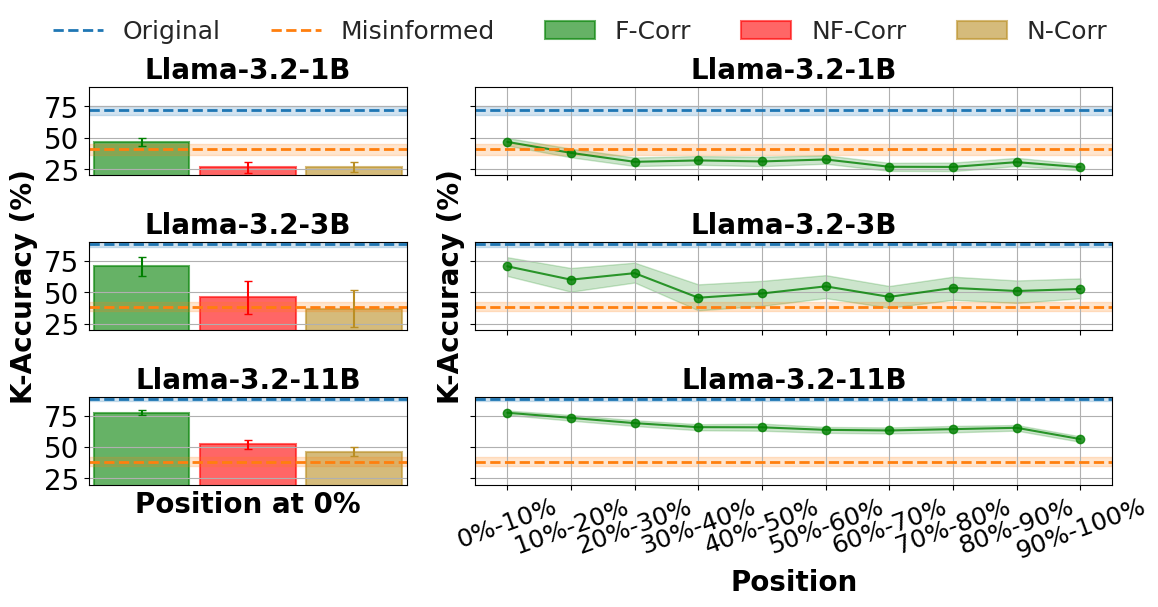

In [19]:
# Example Error Analysis plot
plot_error_analysis_full([error_data_1b, error_data_3b, error_data_11b])
plt.savefig(f"../figures/pathway.pdf", bbox_inches="tight")
plt.show()

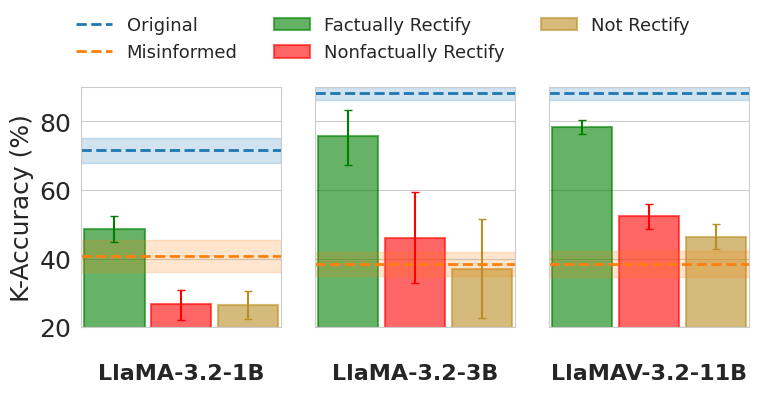

In [17]:
# Example Error Analysis plot
plot_error_analysis_full_bar([error_data_1b, error_data_3b, error_data_11b])
plt.savefig(f"../figures/pathway_bar.pdf", bbox_inches="tight")
plt.show()

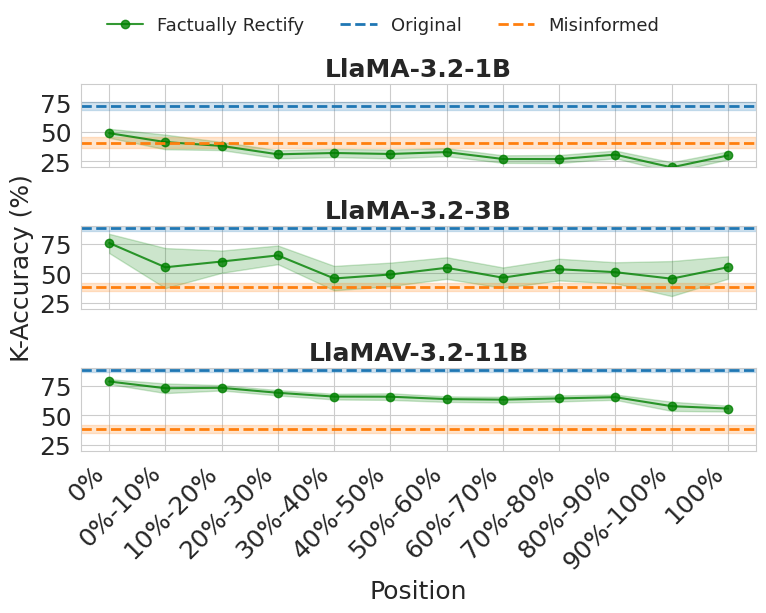

In [18]:
# Example Error Analysis plot
plot_error_analysis_full_line([error_data_1b, error_data_3b, error_data_11b])
plt.savefig(f"../figures/pathway_line.pdf", bbox_inches="tight")
plt.show()

In [28]:
print((-(error_data_1b['perturb_baseline'][0] - error_data_1b['main_results'][1]['mean_ratio']) / error_data_1b['perturb_baseline'][0] * 100) / 1)
print((-(error_data_3b['perturb_baseline'][0] - error_data_3b['main_results'][1]['mean_ratio']) / error_data_3b['perturb_baseline'][0] * 100) / 1)
print((-(error_data_11b['perturb_baseline'][0] - error_data_11b['main_results'][1]['mean_ratio']) / error_data_11b['perturb_baseline'][0] * 100) / 1)
print(((error_data_1b['baseline'][0] - error_data_1b['main_results'][1]['mean_ratio']) / error_data_1b['baseline'][0] * 100) / 1)
print(((error_data_3b['baseline'][0] - error_data_3b['main_results'][1]['mean_ratio']) / error_data_3b['baseline'][0] * 100) / 1)
print(((error_data_11b['baseline'][0] - error_data_11b['main_results'][1]['mean_ratio']) / error_data_11b['baseline'][0] * 100) / 1)

# print((-(error_data_1b['perturb_baseline'][0] - error_data_1b['main_results'][1]['mean_ratio']) / error_data_1b['perturb_baseline'][0] * 100 + -(error_data_3b['perturb_baseline'][0] - error_data_3b['main_results'][1]['mean_ratio']) / error_data_3b['perturb_baseline'][0] * 100 + -(error_data_11b['perturb_baseline'][0] - error_data_11b['main_results'][1]['mean_ratio']) / error_data_11b['perturb_baseline'][0] * 100) / 3)
# print(((error_data_1b['baseline'][0] - error_data_1b['main_results'][1]['mean_ratio']) / error_data_1b['baseline'][0] * 100 + (error_data_3b['baseline'][0] - error_data_3b['main_results'][1]['mean_ratio']) / error_data_3b['baseline'][0] * 100 + (error_data_11b['baseline'][0] - error_data_11b['main_results'][1]['mean_ratio']) / error_data_11b['baseline'][0] * 100) / 3)
print((-(error_data_1b['perturb_baseline'][0] - error_data_1b['ratio_pbq'][0]) / error_data_1b['perturb_baseline'][0] * 100 + -(error_data_1b['perturb_baseline'][0] - error_data_1b['ratio_bq'][0]) / error_data_1b['perturb_baseline'][0] * 100) / 2)
print((-(error_data_3b['perturb_baseline'][0] - error_data_3b['ratio_pbq'][0]) / error_data_3b['perturb_baseline'][0] * 100 + -(error_data_3b['perturb_baseline'][0] - error_data_3b['ratio_bq'][0]) / error_data_3b['perturb_baseline'][0] * 100) / 2)
print((-(error_data_11b['perturb_baseline'][0] - error_data_11b['ratio_pbq'][0]) / error_data_11b['perturb_baseline'][0] * 100 + -(error_data_11b['perturb_baseline'][0] - error_data_11b['ratio_bq'][0]) / error_data_11b['perturb_baseline'][0] * 100) / 2)
# print((-(error_data_3b['perturb_baseline'][0] - error_data_3b['ratio_pbq'][0]) / error_data_3b['perturb_baseline'][0] * 100 + -(error_data_3b['perturb_baseline'][0] - error_data_3b['ratio_bq'][0]) / error_data_3b['perturb_baseline'][0] * 100 + -(error_data_11b['perturb_baseline'][0] - error_data_11b['ratio_pbq'][0]) / error_data_11b['perturb_baseline'][0] * 100 + -(error_data_11b['perturb_baseline'][0] - error_data_11b['ratio_bq'][0]) / error_data_11b['perturb_baseline'][0] * 100) / 4)

14.350671123730585
84.03153556723208
101.58220237166861
35.04643990967396
19.90487338251303
12.70184124147606
-35.05998367451671
7.951690859166185
28.884388591771945


## Verifier F1 and Cohen Kappa

In [ ]:
import pickle
with open(f"../exp_results/eval/test_400_perturbed_premise_evaluated_annotated_final.pkl", "rb") as f:
    annotated_dfs = pickle.load(f)

In [ ]:
answer_verifiers = {}
detection_verifiers = {}
correction_verifiers = {}
perturbation_verifiers = {}
position_verifiers = {}
answer_f1s = []
detection_f1s = []
correction_f1s = []
perturbation_f1s = []
position_f1s = []
for annotator_name in annotated_dfs:
    df_sample = annotated_dfs[annotator_name]
    answer_verifier, detection_verifier, correction_verifier, perturbation_verifier, position_verifier, answer_f1, detection_f1, correction_f1, perturbation_f1, position_f1 = evaluate_results(df_sample, annotator_name)
    answer_verifiers[annotator_name] = answer_verifier
    detection_verifiers[annotator_name] = detection_verifier
    correction_verifiers[annotator_name] = correction_verifier
    perturbation_verifiers[annotator_name] = perturbation_verifier
    position_verifiers[annotator_name] = position_verifier
    print(f"Annotator {annotator_name} Answer Verifier F1: {answer_f1}")
    print(f"Annotator {annotator_name} Detection Verifier F1: {detection_f1}")
    print(f"Annotator {annotator_name} Correction Verifier F1: {correction_f1}")
    print(f"Annotator {annotator_name} Perturbation Verifier F1: {perturbation_f1}")
    print(f"Annotator {annotator_name} Position Verifier F1: {position_f1}")
    print()
    answer_f1s.append(answer_f1)
    detection_f1s.append(detection_f1)
    correction_f1s.append(correction_f1)
    perturbation_f1s.append(perturbation_f1)
    position_f1s.append(position_f1)
    
print(f"Average Answer Verifier F1: {sum(answer_f1s) / len(answer_f1s)}")
print(f"Average Detection Verifier F1: {sum(detection_f1s) / len(detection_f1s)}")
print(f"Average Correction Verifier F1: {sum(correction_f1s) / len(correction_f1s)}")
print(f"Average Perturbation Verifier F1: {sum(perturbation_f1s) / len(perturbation_f1s)}")
print(f"Average Position Verifier F1: {sum(position_f1s) / len(position_f1s)}")

In [ ]:
# Compute Fleiss' Kappa
from utils.annotator.tools import compute_fleiss_kappa
fleiss_kappa = compute_fleiss_kappa(answer_verifiers)
print(f"Answer Verifier Fleiss' Kappa: {fleiss_kappa}")

fleiss_kappa = compute_fleiss_kappa(detection_verifiers)
print(f"Detection Verifier Fleiss' Kappa: {fleiss_kappa}")

fleiss_kappa = compute_fleiss_kappa(correction_verifiers)
print(f"Correction Verifier Fleiss' Kappa: {fleiss_kappa}")

fleiss_kappa = compute_fleiss_kappa(perturbation_verifiers)
print(f"Perturbation Verifier Fleiss' Kappa: {fleiss_kappa}")

fleiss_kappa = compute_fleiss_kappa(position_verifiers)
print(f"Position Verifier Fleiss' Kappa: {fleiss_kappa}")